<h3>Data Cleaning and Initial EDA</h3>


In [97]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [98]:
#read in the data set
global_terrorism_df = pd.read_csv("/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/midterm_project/data/globalterrorismdb_0718dist.csv", encoding='latin-1')

/var/folders/59/vc05kjdn7s14r9w654dq4xlh0000gn/T/ipykernel_96145/4149500987.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  global_terrorism_df = pd.read_csv("/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/midterm_project/data/globalterrorismdb_0718dist.csv", encoding='latin-1')


In [99]:
cols = list(global_terrorism_df.columns)
print(cols)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [100]:
global_terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [101]:
missing_percentage = global_terrorism_df.isna().mean() * 100
print(missing_percentage)

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64


In [102]:
global_terrorism_df['resolution'].value_counts()

8/4/1998      18
2/23/1988     11
10/14/2005     8
1/8/2010       8
2/22/1994      8
              ..
2/9/1991       1
2/1/1991       1
1/15/1991      1
1/12/1991      1
12/27/2011     1
Name: resolution, Length: 1859, dtype: int64

In [103]:
#collumns I want to keep
columns_to_keep = ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr','multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'motive', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillter', 'nwound', 'nwoundte', 'property', 'propextent', 'propvalue',  'ransom','ransomamt', 'ransompaid']

#drop other columns not in kept columns
global_terrorism_df = global_terrorism_df.drop(columns=[col for col in global_terrorism_df.columns if col not in columns_to_keep])


In [104]:
global_terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,country,country_txt,region,region_txt,...,nkill,nkillter,nwound,nwoundte,property,propextent,propvalue,ransom,ransomamt,ransompaid
0,197000000001,1970,7,2,NaN,0,58,Dominican Republic,2,Central America & Caribbean,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN
1,197000000002,1970,0,0,NaN,0,130,Mexico,1,North America,...,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,800000.0,NaN
2,197001000001,1970,1,0,NaN,0,160,Philippines,5,Southeast Asia,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN
3,197001000002,1970,1,0,NaN,0,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN
4,197001000003,1970,1,0,NaN,0,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN


In [105]:
global_terrorism_df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
approxdate           object
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
motive               object
guncertain1         

<h5>initial data cleaning plan:</h5>

1. convert approxdate into date type and use iyear, imonth, iday to create it --> call it date

2. drop iyear, imonth, iday because they can be extracted from data

3. convert resolution to binary variable 0 if not resolved 1 if resolved

4. use ransom binary variable to clean ransomamt if ransom = 0 ransomamt = 0

5. clean the property related columns by changing property to a binary variable and adding the values where needed for propextent and propvalue


In [106]:
# Create the date column
global_terrorism_df['approxdate'] = pd.to_datetime(
    global_terrorism_df[['iyear', 'imonth', 'iday']].astype(str).apply('-'.join, axis=1),
    errors='coerce'
)

In [107]:
#some month and day counts = 0 making the date column
global_terrorism_df['approxdate'].isna().value_counts()

False    180800
True        891
Name: approxdate, dtype: int64

In [108]:
global_terrorism_df.loc[global_terrorism_df['approxdate'].isna()]

,eventid,iyear,imonth,iday,approxdate,extended,country,country_txt,region,region_txt,...,nkill,nkillter,nwound,nwoundte,property,propextent,propvalue,ransom,ransomamt,ransompaid
1,197000000002,1970,0,0,NaT,0,130,Mexico,1,North America,...,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,800000.0,NaN
2,197001000001,1970,1,0,NaT,0,160,Philippines,5,Southeast Asia,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN
3,197001000002,1970,1,0,NaT,0,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN
4,197001000003,1970,1,0,NaT,0,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN
96,197003000001,1970,3,0,NaT,0,160,Philippines,5,Southeast Asia,...,0.0,NaN,0.0,NaN,1,3.0,500.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104603,201112170006,2011,12,0,NaT,0,155,West Bank and Gaza Strip,10,Middle East & North Africa,...,0.0,0.0,0.0,0.0,1,4.0,NaN,NaN,NaN,NaN
104611,201112170021,2011,12,0,NaT,0,153,Pakistan,6,South Asia,...,0.0,0.0,0.0,0.0,1,4.0,NaN,NaN,NaN,NaN
104612,201112170022,2011,12,0,NaT,0,153,Pakistan,6,South Asia,...,0.0,0.0,0.0,0.0,1,4.0,NaN,NaN,NaN,NaN
104613,201112170024,2011,12,0,NaT,0,153,Pakistan,6,South Asia,...,0.0,0.0,0.0,0.0,1,4.0,NaN,NaN,NaN,NaN


In [109]:
#convert all the iday values == 0 to 1 to create appoximate dates
global_terrorism_df.loc[global_terrorism_df['iday'] == 0, 'iday'] = 1

#re-run the approxdate imputation
global_terrorism_df['approxdate'] = pd.to_datetime(
    global_terrorism_df[['iyear', 'imonth', 'iday']].astype(str).apply('-'.join, axis=1),
    errors='coerce'
)
#check the NaN count
global_terrorism_df['approxdate'].isna().value_counts()

False    181671
True         20
Name: approxdate, dtype: int64

In [110]:
#drop the remaining 20 columns
global_terrorism_df.drop(global_terrorism_df.loc[global_terrorism_df['imonth'] == 0].index, inplace=True)

#drop iday, imonth, and iyear columns because the data can be extracted from approxdate as needed
global_terrorism_df.drop(columns=(['iyear', 'imonth', 'iday']), inplace=True)

In [111]:
#drop the time stamp off of approxdate
global_terrorism_df['approxdate'] = global_terrorism_df['approxdate'].dt.date

In [112]:
global_terrorism_df.head()


,eventid,approxdate,extended,country,country_txt,region,region_txt,provstate,city,latitude,...,nkill,nkillter,nwound,nwoundte,property,propextent,propvalue,ransom,ransomamt,ransompaid
0,197000000001,1970-07-02,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN
2,197001000001,1970-01-01,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN
3,197001000002,1970-01-01,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN
4,197001000003,1970-01-01,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN
5,197001010002,1970-01-01,0,217,United States,1,North America,Illinois,Cairo,37.005105,...,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,NaN,NaN


In [113]:
#check the values for the ransom variables
global_terrorism_df[['ransom', 'ransomamt', 'ransompaid']].value_counts()

#set ransom == -9.0 to 0
global_terrorism_df.loc[global_terrorism_df['ransom'] == -9.0, 'ransom'] = 0

#set ransomamt == -99.0 to 0
global_terrorism_df.loc[global_terrorism_df['ransomamt'] < 0, 'ransomamt'] = 0

#set ransp,paid = -99 to 0
global_terrorism_df.loc[global_terrorism_df['ransompaid'] < 0, 'ransompaid'] = 0

#if there is no ransom set ransomamt and ransompaid = 0
global_terrorism_df.loc[global_terrorism_df['ransom'] == 0, ['ransomamt', 'ransompaid']] = [0, 0]

In [114]:
#check how many NaN values there are
global_terrorism_df[['ransom', 'ransomamt', 'ransompaid']].isna().value_counts()

#if all rows are NaN fill with 0
#create a boolean mask that gets all the rows where they are all NaN
mask = global_terrorism_df[['ransom', 'ransomamt', 'ransompaid']].isna().all(axis=1)

#set all those values = o
global_terrorism_df.loc[mask, ['ransom', 'ransomamt', 'ransompaid']] = 0


global_terrorism_df[['ransom', 'ransomamt', 'ransompaid']].isna().value_counts()

ransom  ransomamt  ransompaid
False   False      False         181055
                   True             582
        True       True              21
                   False              9
True    False      False              3
                   True               1
dtype: int64

In [115]:
#if ransomamt not null but ransom is, set ransom = 1
#just set to 1 b/c ransomamt and ransompaid were not null suggesting there was in fact a rabnsom
global_terrorism_df.loc[global_terrorism_df['ransom'].isna() == True] = 1 

#access rows where ransomamt and ransompaid are Nan but not ransom
cond = (global_terrorism_df['ransom'].notna()) & (global_terrorism_df['ransomamt'].isna()) & (global_terrorism_df['ransompaid'].isna())
cond.value_counts()

#drop those columns
global_terrorism_df.drop(global_terrorism_df[cond].index, inplace=True)

In [116]:
global_terrorism_df[['ransom', 'ransomamt', 'ransompaid']].isna().value_counts()

ransom  ransomamt  ransompaid
False   False      False         181059
                   True             582
        True       False              9
dtype: int64

In [117]:
#get rows where ransom and ransompaid are not null but rasnomamt is
cond = (global_terrorism_df['ransom'].notna()) & (global_terrorism_df['ransomamt'].isna()) & (global_terrorism_df['ransompaid'].notna())

#assume that the ransompaid was equal to the ransom ammount in all cases that make sense
global_terrorism_df.loc[cond, 'ransomamt'] = global_terrorism_df.loc[cond, 'ransompaid']


In [118]:
global_terrorism_df.shape

(181650, 51)

In [119]:
#check the uniqueness of the eventid
global_terrorism_df['eventid'].value_counts() > 1

1                True
197000000001    False
201309110039    False
201309110041    False
201309110042    False
                ...  
199510040012    False
199510040013    False
199510050001    False
199510050002    False
201712310032    False
Name: eventid, Length: 181647, dtype: bool

In [120]:
#drop the events qith id 1
global_terrorism_df.drop(global_terrorism_df[global_terrorism_df['eventid'] == 1].index, inplace=True)

global_terrorism_df.shape

(181646, 51)

In [121]:
#re-check the uniqueness of the eventid
global_terrorism_df['eventid'].duplicated().any() #returns false meaning they are all unique

False

In [122]:
#convert ransom to int8
global_terrorism_df['ransom'] = global_terrorism_df['ransom'].astype('Int8')

In [123]:
#Check the values of success, if its a dummy variable, reduce the size of the integer to icrease storage
global_terrorism_df['success'].value_counts()

#convert
global_terrorism_df['success'] = global_terrorism_df['success'].astype('Int8')

In [124]:
#Check the values of extended, if its a dummy variable, reduce the size of the integer to icrease storage
global_terrorism_df['extended'].value_counts()

global_terrorism_df['extended'] = global_terrorism_df['extended'].astype('Int8')

In [125]:
#propextent clasifies the dollar value, set = 1 for propvalue less than 20000, 2 for values betweem 20 and 35, 3 for values between 35 and 50 and 4 otherwise
property_value = global_terrorism_df['propvalue']
property_extent = global_terrorism_df['propextent']

# Define the conditions for classification
extent_1 = property_value <= 20000
extent_2 = (property_value > 20000) & (property_value <= 35000)
extent_3 = (property_value > 35000) & (property_value <= 50000)
extent_4 = property_value > 50000

# Assign the classifications to the propextent column

#ignore the SettingWithoutCopy warning --> used the internet
with pd.option_context('mode.chained_assignment', None):
    global_terrorism_df.loc[extent_1, 'propextent'] = 1
    global_terrorism_df.loc[extent_2, 'propextent'] = 2
    global_terrorism_df.loc[extent_3, 'propextent'] = 3
    global_terrorism_df.loc[extent_4, 'propextent'] = 4

#convert NaN values to -1 and convert type
global_terrorism_df['propextent'] = global_terrorism_df['propextent'].fillna(-1).astype('int8')

global_terrorism_df[['property', 'propextent', 'propvalue']].value_counts()

property  propextent  propvalue    
1         1           -9.900000e+01    28280
          3            5.000000e+04     1185
          1            1.000000e+04      805
                       2.000000e+04      756
                       5.000000e+03      578
                                       ...  
                       1.124790e+03        1
          4            5.012500e+04        1
          1            1.129000e+03        1
          3            4.782500e+04        1
          4            2.700000e+09        1
Length: 661, dtype: int64

In [126]:
global_terrorism_df['propextent'].dtypes

dtype('int8')

In [127]:
#check for property values that dont make any sense and fix them as necessary
global_terrorism_df['propvalue'] = global_terrorism_df['propvalue'].replace(-99.0, np.nan)


In [128]:
#if property binary variable = 0 set propvalue and propextent= 0
global_terrorism_df.loc[global_terrorism_df['property'] == 0, ['propvalue', 'propextent']] = [0, 0]

#access variables where propextent > 0 but propvalue is NaN and set the value to the mean of its range, only if property = 1
cond = (global_terrorism_df['property'] == 1) & (global_terrorism_df['propextent'] > 0) & global_terrorism_df['propvalue'].isna()
global_terrorism_df.loc[cond]

#define the ranges
extent_1_range = (1, 20000)
extent_2_range = (20001, 35000)
extent_3_range = (35001, 50000)
extent_4_range = (500001, global_terrorism_df['property'].max())


#use imputation to set the values
global_terrorism_df.loc[(global_terrorism_df['propextent'] == 1) & cond, 'propvalue'] = sum(extent_1_range) / 2
global_terrorism_df.loc[(global_terrorism_df['propextent'] == 2) & cond, 'propvalue'] = sum(extent_2_range) / 2
global_terrorism_df.loc[(global_terrorism_df['propextent'] == 3) & cond, 'propvalue'] = sum(extent_3_range) / 2
global_terrorism_df.loc[(global_terrorism_df['propextent'] == 4) & cond, 'propvalue'] = sum(extent_4_range) / 2

In [129]:
#check the values
global_terrorism_df[['property', 'propextent', 'propvalue']].isna().value_counts()

property  propextent  propvalue
False     False       False        127394
                      True          54252
dtype: int64

In [130]:
#check what percentage of nkill, nkillter, nwound, nwoundte is NaN and evaluate where imputation can be made
global_terrorism_df[['nkill', 'nkillter', 'nwound', 'nwoundte']].isna().value_counts() / len(global_terrorism_df[['nkill', 'nkillter', 'nwound', 'nwoundte']]) * 100

nkill  nkillter  nwound  nwoundte
False  False     False   False       58.536934
       True      False   True        31.389075
True   True      True    True         3.679685
       False     True    False        1.652115
False  False     True    False        1.495766
       True      True    True         1.454477
       False     False   True         0.682646
                 True    True         0.655120
True   True      False   True         0.161303
False  True      False   False        0.109003
True   False     False   False        0.104599
       True      False   False        0.042941
       False     True    True         0.025324
False  True      True    False        0.006056
True   True      True    False        0.003854
       False     False   True         0.001101
dtype: float64

In [131]:
global_terrorism_df.dtypes

eventid               int64
approxdate           object
extended               Int8
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success                Int8
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
motive               object
guncertain1         float64
individual            int64
nperps              float64
nperpcap            

In [132]:
#fix some of the text in the motive column

global_terrorism_df['motive'] = global_terrorism_df['motive'].fillna('Unknown')

keywords = [
    'The specific motive for the attack is Unknown or was not reported.',
    'The specific motive for the attack is Unknown..',
    'The specific motive for the attack is Unknown.', 
    'The specific motive for the attack is Unknown'
    ]

default_value = 'Unknown'

#set variations to just Unknown
global_terrorism_df['motive'] = global_terrorism_df['motive'].apply(lambda x: default_value if x in keywords else x)


/var/folders/59/vc05kjdn7s14r9w654dq4xlh0000gn/T/ipykernel_96145/1411896950.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 800x500 with 0 Axes>

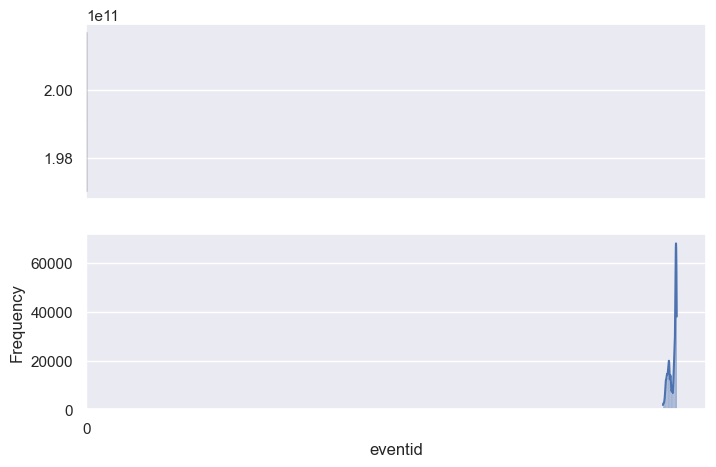

<Figure size 800x500 with 0 Axes>

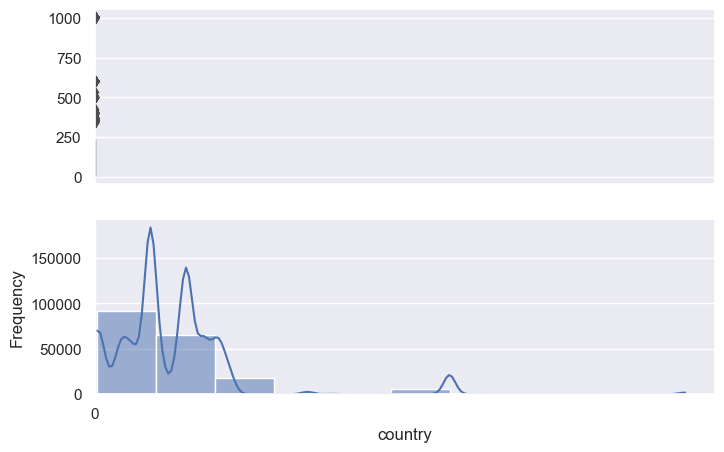

<Figure size 800x500 with 0 Axes>

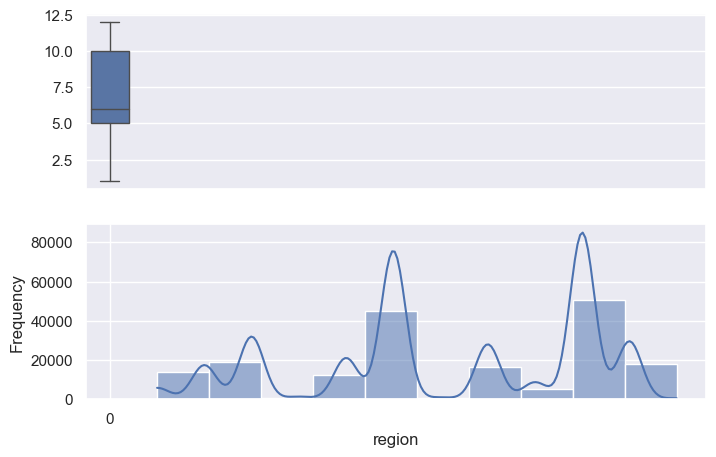

<Figure size 800x500 with 0 Axes>

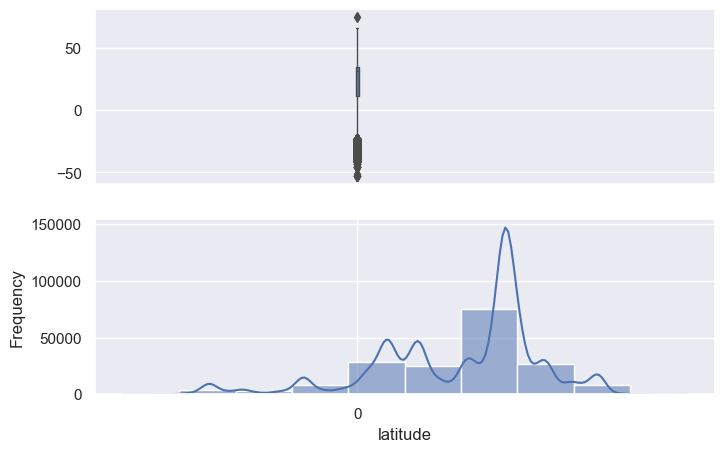

<Figure size 800x500 with 0 Axes>

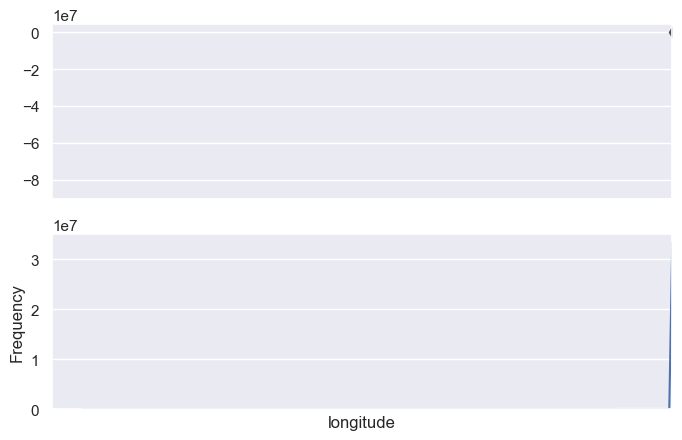

<Figure size 800x500 with 0 Axes>

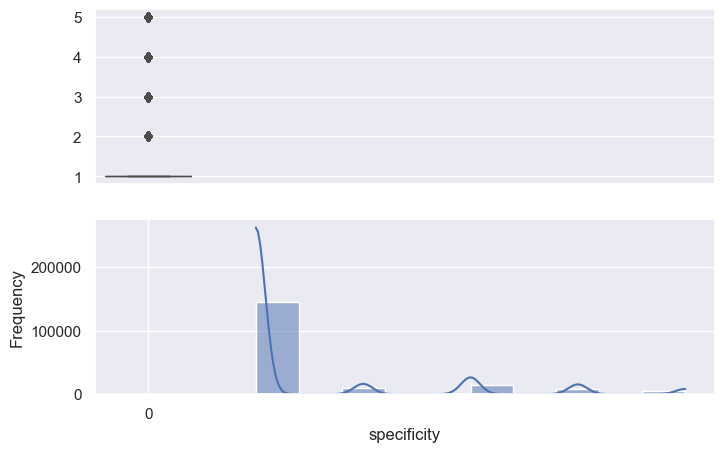

<Figure size 800x500 with 0 Axes>

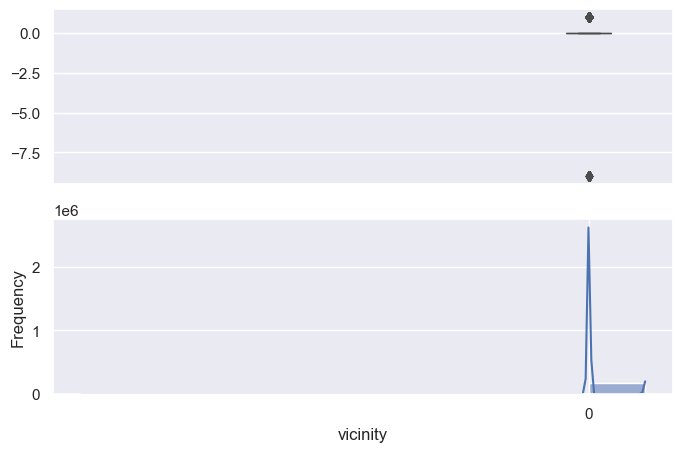

<Figure size 800x500 with 0 Axes>

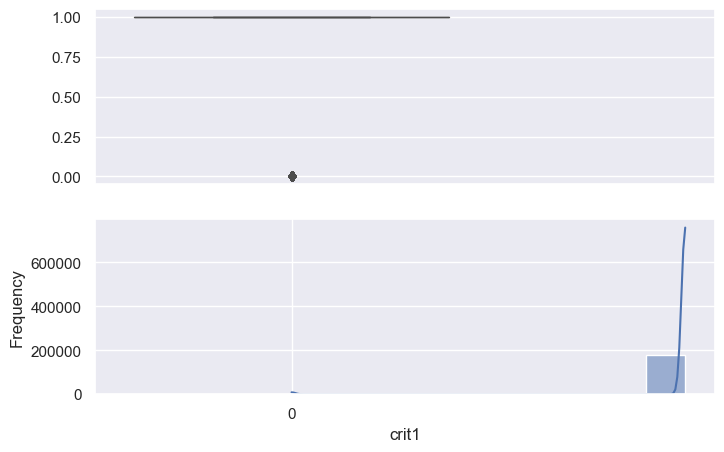

<Figure size 800x500 with 0 Axes>

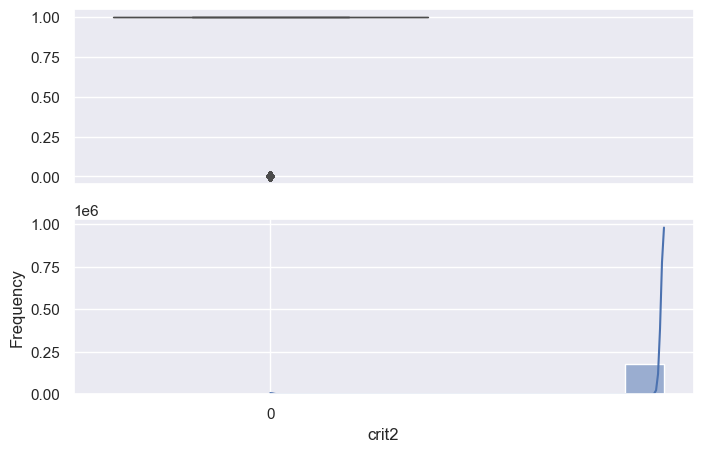

<Figure size 800x500 with 0 Axes>

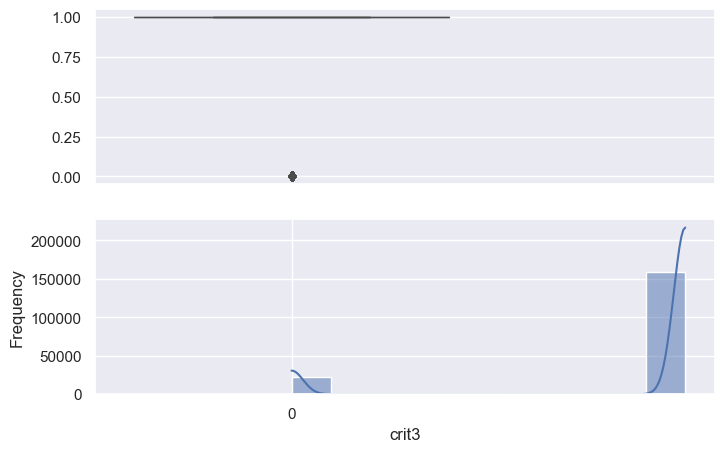

<Figure size 800x500 with 0 Axes>

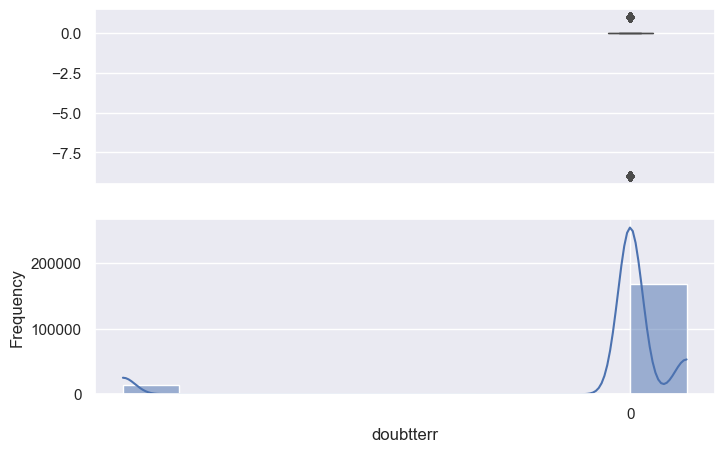

<Figure size 800x500 with 0 Axes>

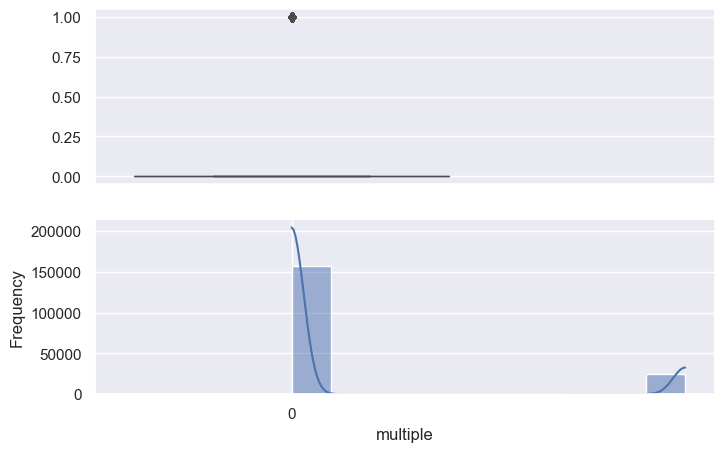

<Figure size 800x500 with 0 Axes>

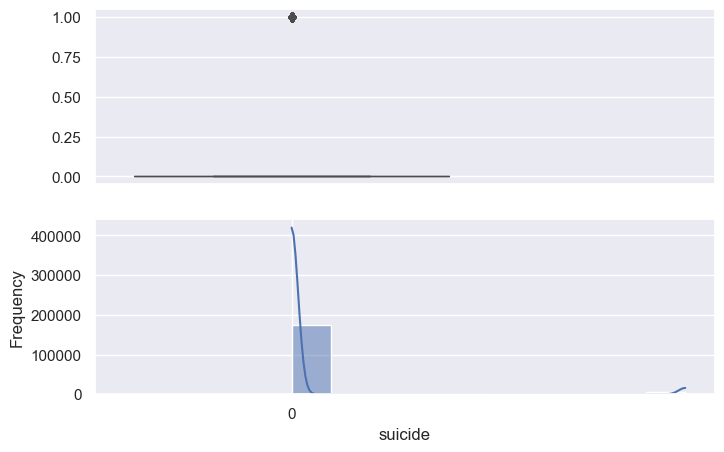

<Figure size 800x500 with 0 Axes>

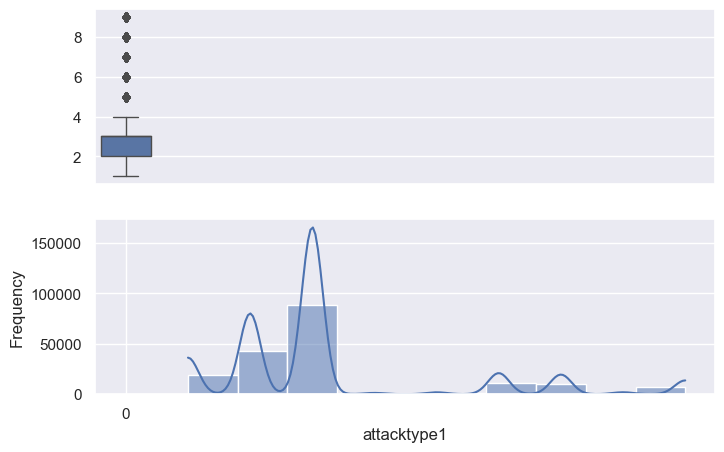

<Figure size 800x500 with 0 Axes>

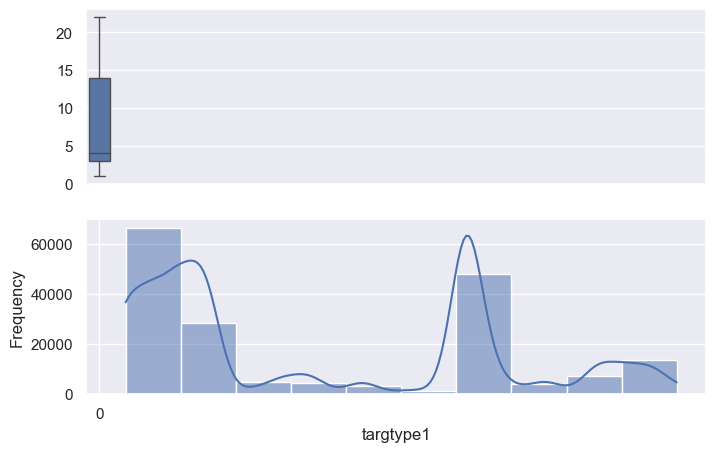

<Figure size 800x500 with 0 Axes>

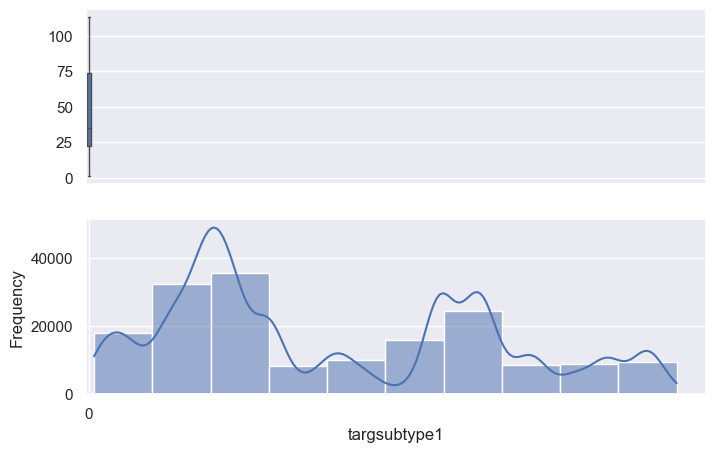

<Figure size 800x500 with 0 Axes>

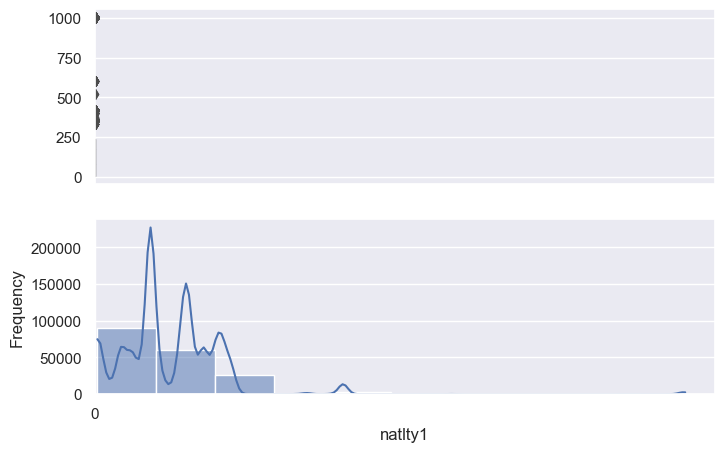

<Figure size 800x500 with 0 Axes>

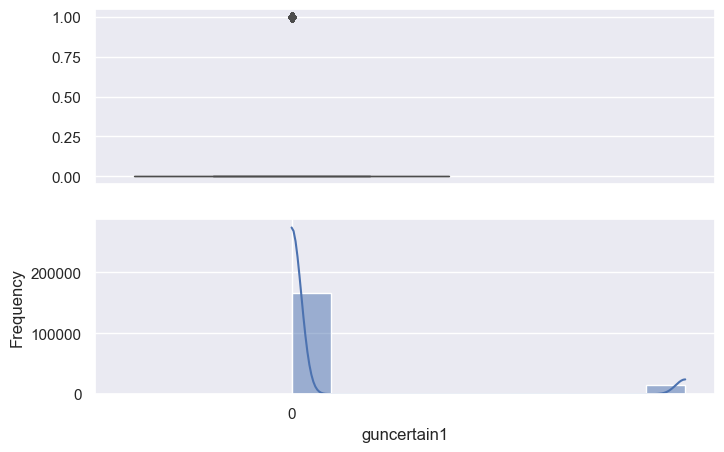

<Figure size 800x500 with 0 Axes>

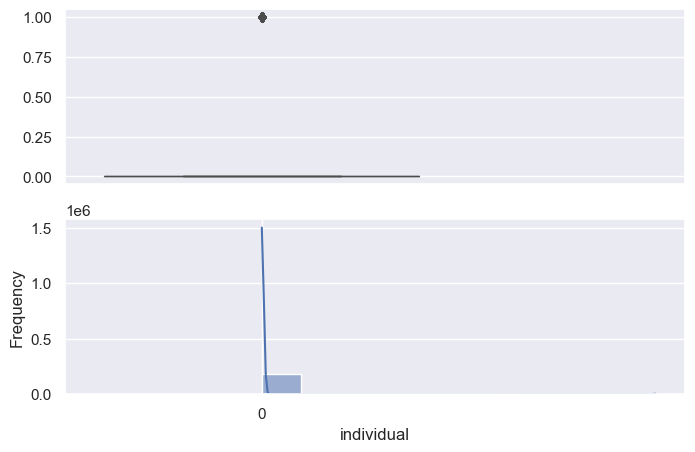

<Figure size 800x500 with 0 Axes>

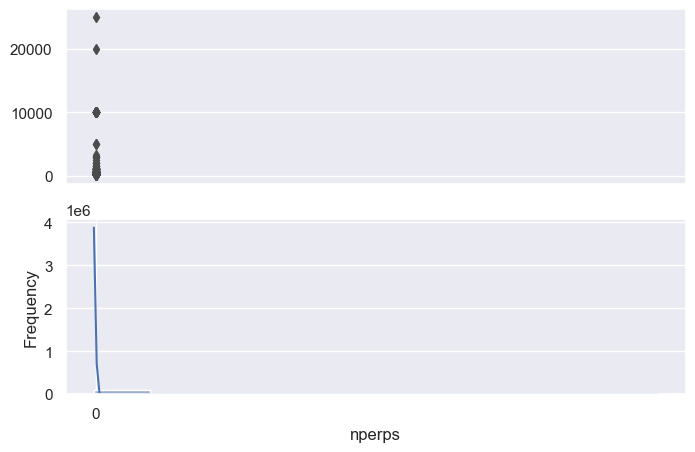

<Figure size 800x500 with 0 Axes>

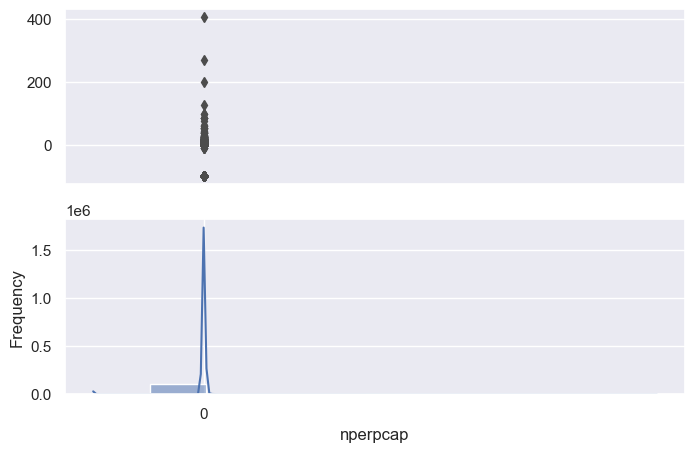

<Figure size 800x500 with 0 Axes>

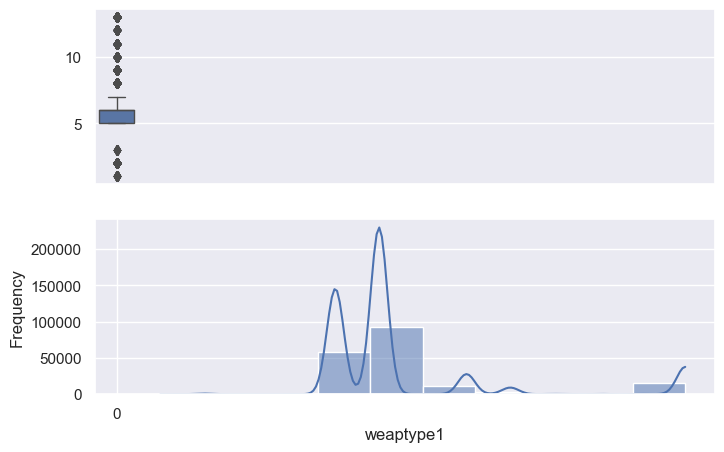

<Figure size 800x500 with 0 Axes>

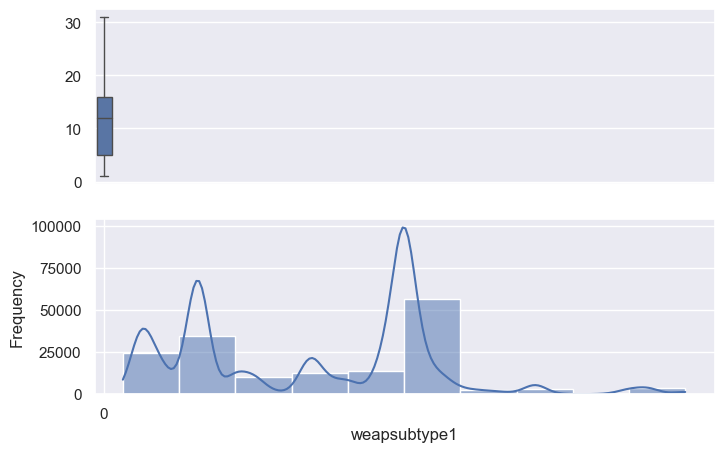

<Figure size 800x500 with 0 Axes>

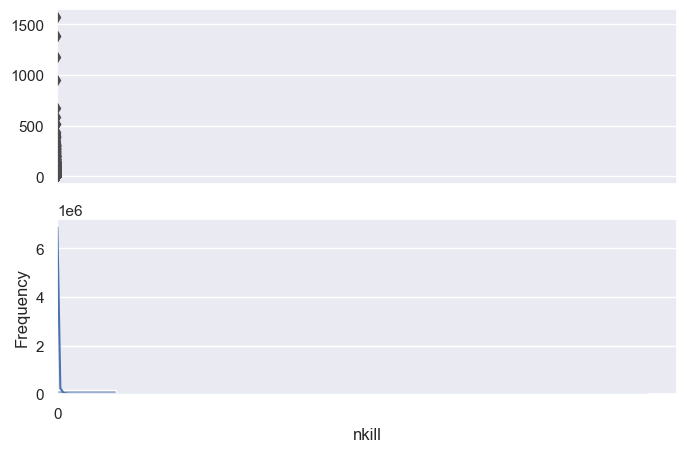

<Figure size 800x500 with 0 Axes>

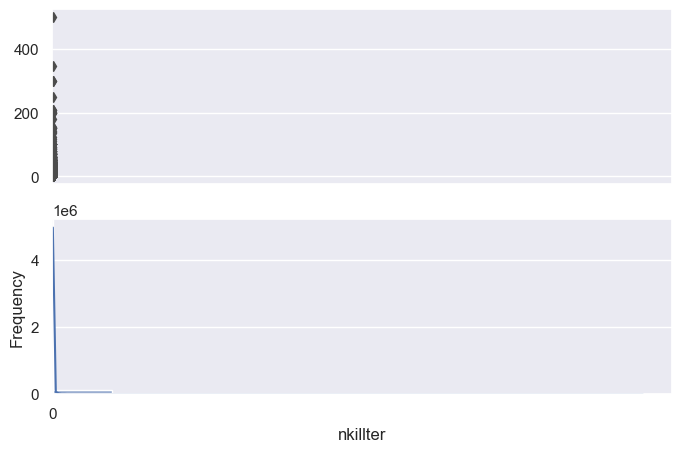

<Figure size 800x500 with 0 Axes>

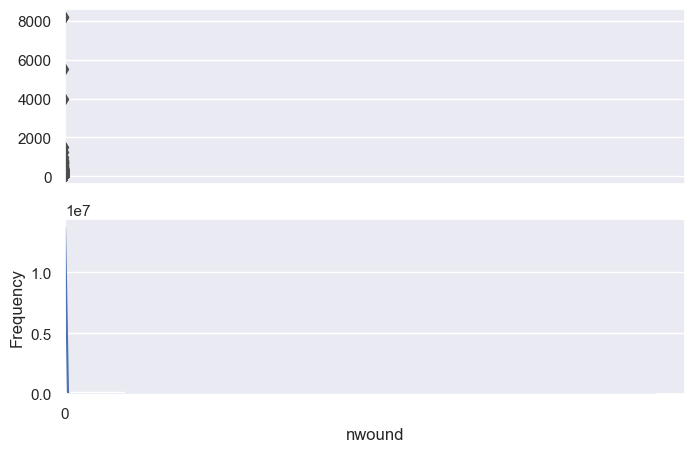

<Figure size 800x500 with 0 Axes>

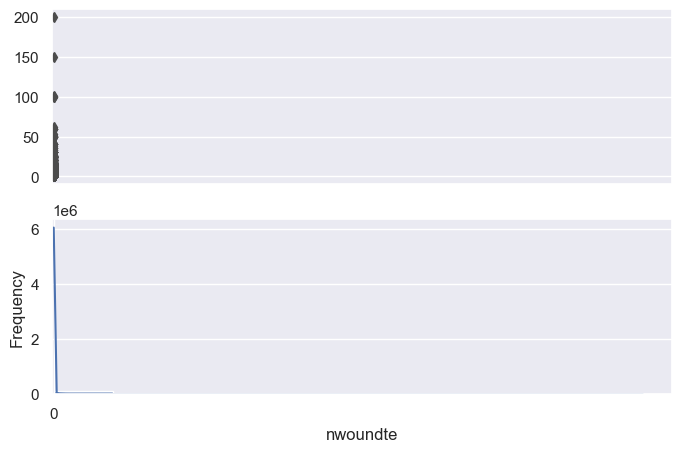

<Figure size 800x500 with 0 Axes>

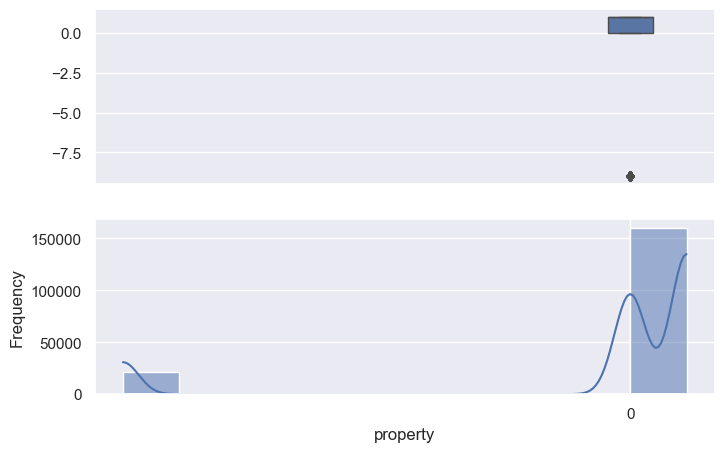

<Figure size 800x500 with 0 Axes>

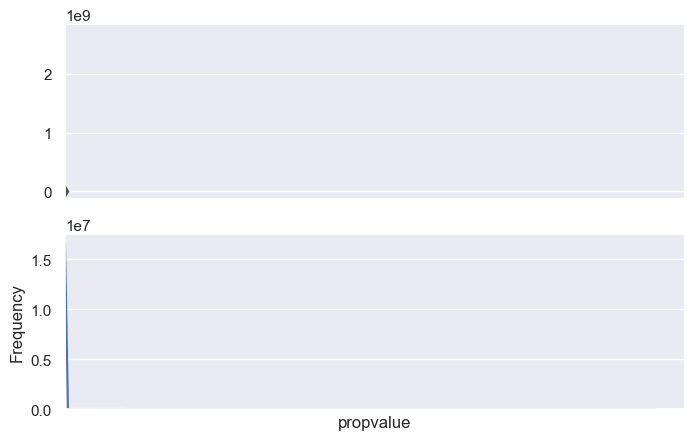

<Figure size 800x500 with 0 Axes>

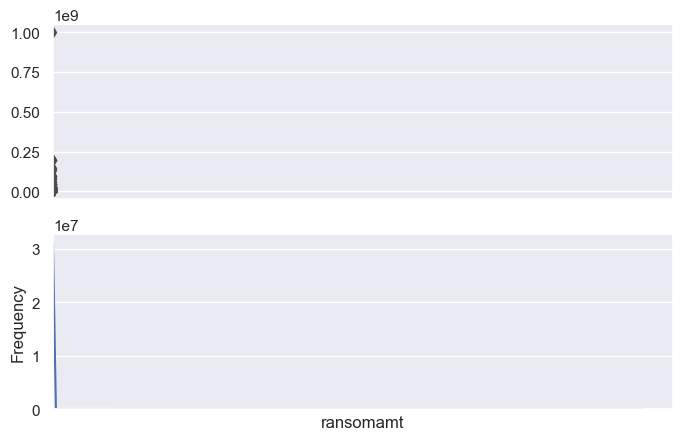

<Figure size 800x500 with 0 Axes>

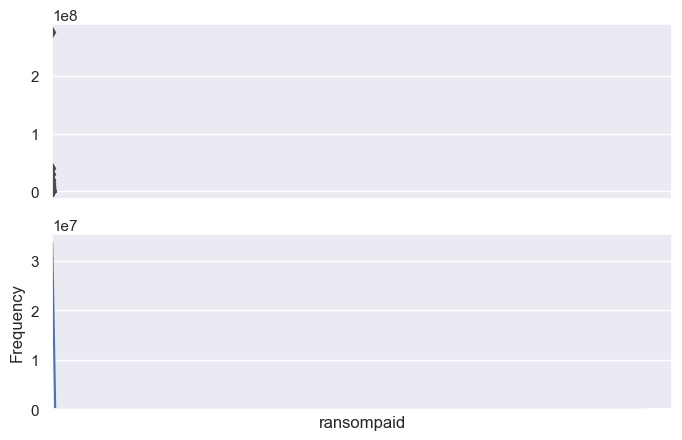

In [133]:
for col in global_terrorism_df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= col,ylabel='Frequency')
    sns.boxplot(global_terrorism_df[col], ax=ax_box , linewidth= 1.0)
    sns.histplot(global_terrorism_df[col], ax=ax_hist , bins = 10,kde=True)

In [141]:
global_terrorism_df.shape

(181646, 51)

In [136]:
#save as a csv file so that i can store it in the github repositpory
global_terrorism_df.to_csv("/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/midterm_project/data/global_terrorism.csv")